In [1]:
## resource: https://www.kaggle.com/cast42/exploring-features

## import library
import pandas as pd
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
## warnings from seaborn, data visualization package.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)

%matplotlib inline

In [2]:
## load the dataset
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [3]:
## You are provided with an anonymized dataset containing a large number of numeric variables. 
## The "TARGET" column is the variable to predict. 
## It equals one for unsatisfied customers and 0 for satisfied customers.
display(train.head(5))

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
display(train.describe())

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
## Target 0: Happy customers, Target 1: Unhappy customers
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100 * df['TARGET']/train.shape[0]
print(df)

   TARGET  Percentage
0   73012   96.043147
1    3008    3.956853


In [6]:
## find the patterns of the data
print(train.var3.value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [7]:
## since vars represents the nationality
## -999999 means there is no content.
## We can replace it by, here, the most common value: 2
train = train.replace(-999999,2)
print(train.var3.value_counts()[:10])

2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
Name: var3, dtype: int64


In [8]:
## add the column with information giving the number of 0 in such row
##   ...........       n0 
##   0  0  1  3   -->   2
##   1  4  5  0   -->   1

## feature: X, label: y
X = train.iloc[:,:-1]
y = train.TARGET

X['n0'] = (X == 0).sum(axis=1)
train['n0'] = X['n0']


In [9]:
print(X.head(5))

   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3 ...   \
0                      0.0                      0.0 ... 

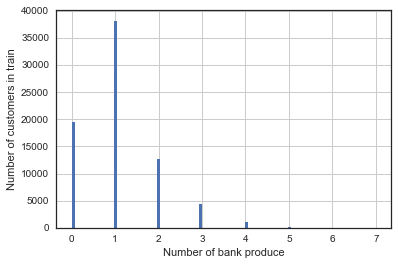

In [10]:
## Based on @dmi3kno https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223
## num_var4 is the number of products

train.num_var4.hist(bins=100)
plt.xlabel('Number of bank produce')
plt.ylabel('Number of customers in train')
#plt.title('Most customers have 1 product with the bank')
plt.show()

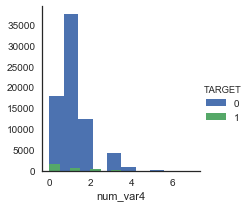

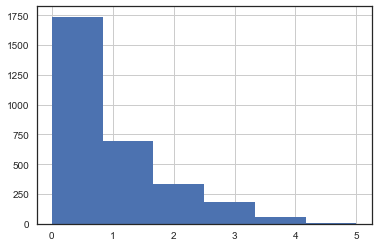

In [11]:
sns.FacetGrid(train, hue="TARGET").map(plt.hist, "num_var4").add_legend()
plt.show()

train[train.TARGET==1].num_var4.hist(bins=6)


In [12]:
## The importance of the feature 
## by XGBOOST
## https://www.kaggle.com/cast42/xgboost-with-early-stopping/code
## and here https://www.kaggle.com/tks0123456789/data-exploration/notebook
print(train.var38.describe())

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64


In [13]:
## try to link the var38 with customer satisfactory
train.loc[train["TARGET"]==1, 'var38'].describe()


count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

In [14]:
#train.var38.value_counts()
train.var38.value_counts().nlargest(10)


117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
236690.340000        8
329603.970000        7
104644.410000        7
67088.310000         7
125722.440000        7
Name: var38, dtype: int64

In [15]:
## exclude the largest value 117310.979016
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts()
print(train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts().nlargest(5))

451931.22    16
463625.16    12
288997.44    11
104563.80    11
236690.34     8
Name: var38, dtype: int64


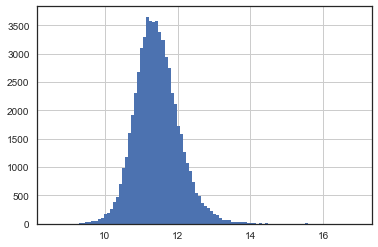

In [16]:
## print distribution in log
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100);

In [17]:
## new feature splitting var38 into two group

train['var38mc'] = np.isclose(train.var38, 117310.979016)
train.var38mc.value_counts()

False    61151
True     14869
Name: var38mc, dtype: int64

In [18]:
train['logvar38'] = train.loc[-train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

In [19]:
print("Number of nan in var38mc", train['var38mc'].isnull().sum())
print("Number of nan in logvar38", train['logvar38'].isnull().sum())

Number of nan in var38mc 0
Number of nan in logvar38 0


In [20]:
## some discussion of var15
## https://www.kaggle.com/c/santander-customer-satisfaction/discussion/19291#110414
train.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

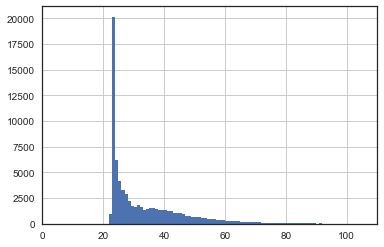

In [21]:
train.var15.hist(bins=100)

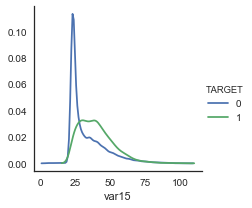

In [22]:
sns.FacetGrid(train, hue='TARGET').map(sns.kdeplot, "var15").add_legend()


count    7.602000e+04
mean     1.367967e+04
std      6.301408e+04
min     -4.942260e+03
25%      0.000000e+00
50%      3.000000e+00
75%      2.359950e+02
max      3.458077e+06
Name: saldo_var30, dtype: float64
Axes(0.125,0.125;0.775x0.755)


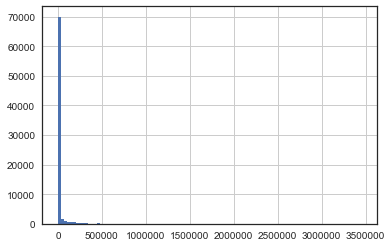

In [23]:
print(train.saldo_var30.describe())
print(train.saldo_var30.hist(bins=100))

In [24]:
train['log_saldo_var30'] = train.saldo_var30.map(np.log)

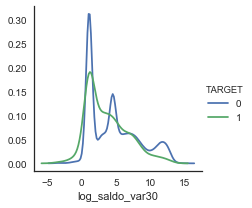

In [25]:
sns.FacetGrid(train, hue="TARGET").map(sns.kdeplot, "log_saldo_var30").add_legend()

### showing interaction using seaborn with FacetGrid ###

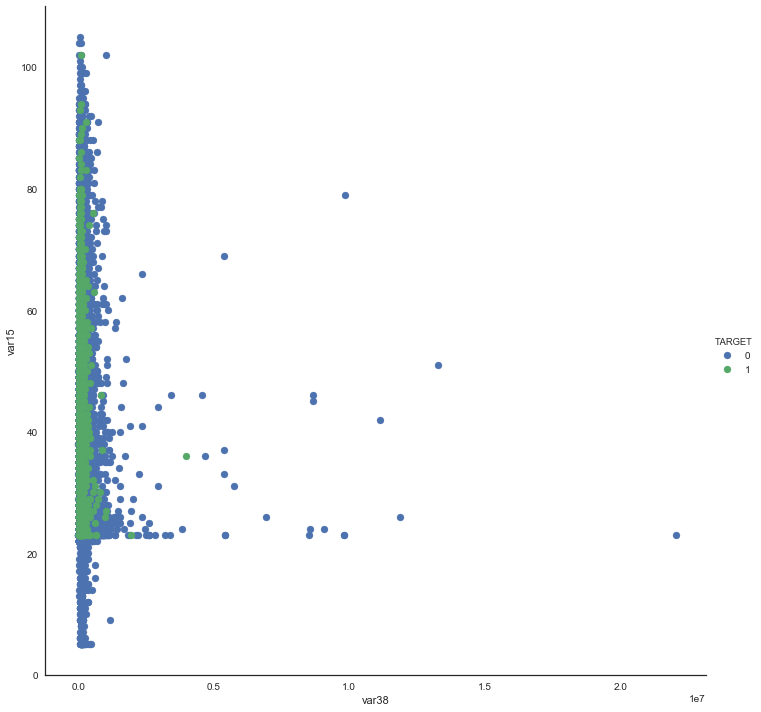

In [26]:
sns.FacetGrid(train, hue="TARGET", size = 10).map(plt.scatter, "var38", "var15").add_legend()

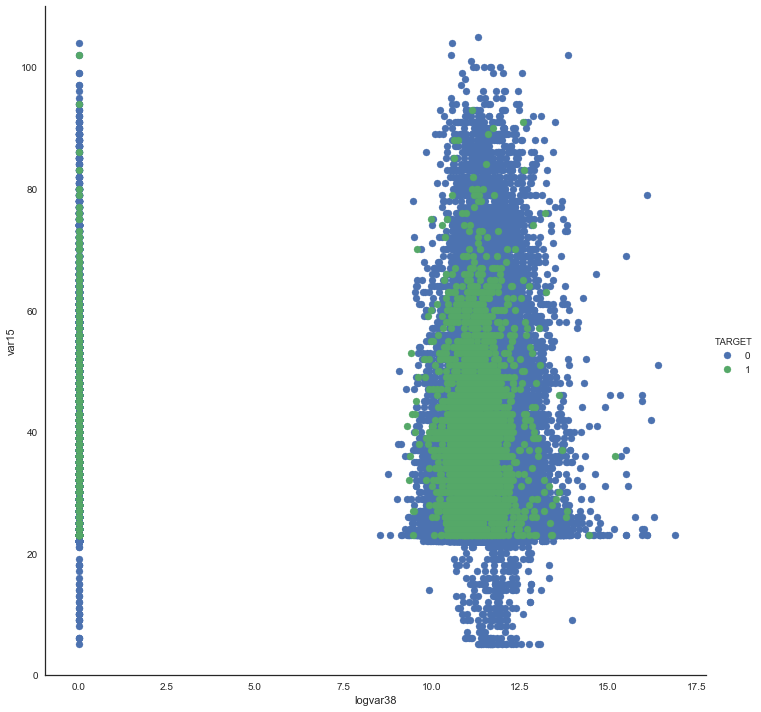

In [27]:
## what if we plot with nature log scale
sns.FacetGrid(train, hue="TARGET", size= 10).map(plt.scatter, "logvar38", "var15").add_legend()

### select the most important feature ###

In [28]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import Binarizer, scale

In [29]:
## Select features based on chi2 and f_classif

p = 3

X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
chi2_selected = selectChi2.get_support()
chi2_selected_features = [f for i, f in enumerate(X.columns) if chi2_selected[i]]
print("Chi2 selected {} features {}.".format(chi2_selected.sum(), chi2_selected_features))

selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i, f in enumerate(X.columns) if f_classif_selected[i]]
print("\nF_classif selected {} features {}.".format(f_classif_selected.sum(), f_classif_selected_features))

## common features
selected = chi2_selected & f_classif_selected
print("\nChi2 & F_classif selected {} features".format(selected.sum()))
features = [f for f,s in zip(X.columns, selected) if s]
print(features)





Chi2 selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var30_0', 'num_var30', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3'].

F_classif selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var30', 'num_var35', 'num_var42', 'var36', 'num_meses_var5_ult3', 'n0'].

Chi2 & F_classif selected 9 features
['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var30', 'num_var42', 'var36', 'num_meses_var5_ult3']


In [30]:
## Most important features + TARGET
this = train[features]
print(this.head(5))

X_sel = train[features + ['TARGET'] ]
print(X_sel.head(5))

   var15  ind_var5  ind_var8_0  ind_var30  num_var5  num_var30  num_var42  \
0     23         0           0          0         0          0          0   
1     34         0           0          1         0          3          0   
2     23         1           0          1         3          3          3   
3     37         1           0          1         3          3          3   
4     39         0           0          1         0          3          3   

   var36  num_meses_var5_ult3  
0     99                    0  
1      3                    1  
2     99                    3  
3      2                    2  
4      1                    3  
   var15  ind_var5  ind_var8_0  ind_var30  num_var5  num_var30  num_var42  \
0     23         0           0          0         0          0          0   
1     34         0           0          1         0          3          0   
2     23         1           0          1         3          3          3   
3     37         1           0       

In [31]:
display(X_sel.var36.value_counts())

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

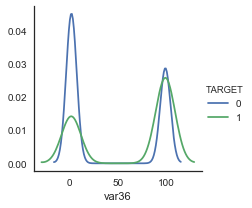

In [32]:
## density of function plot
sns.FacetGrid(train, hue="TARGET").map(sns.kdeplot, "var36").add_legend()

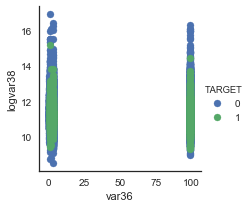

In [33]:
## Compare whether two features are common
sns.FacetGrid(train[~train.var38mc], hue="TARGET").map(plt.scatter, "var36", "logvar38").add_legend()

### While var36 = 0, all of them are happy customer. ###

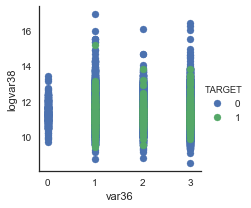

In [34]:
## zoom in 
sns.FacetGrid(train[(~train.var38mc) & (train.var36 < 4)], hue="TARGET").map(plt.scatter, "var36", "logvar38").add_legend()

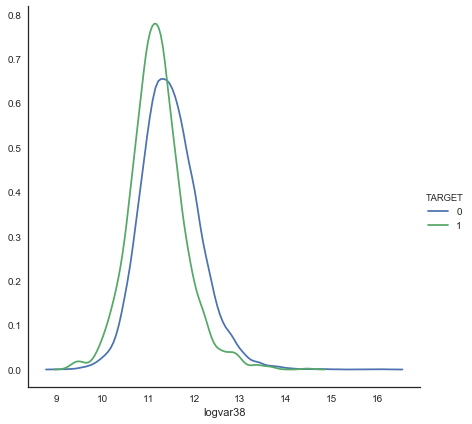

In [35]:
## The density in function of the target variabele, when var36 = 99
sns.FacetGrid(train[(~train.var38mc) & (train.var36 ==99)], hue="TARGET", size=6) \
   .map(sns.kdeplot, "logvar38") \
   .add_legend()

In [36]:
print(train.num_var5.value_counts())

3     50265
0     25561
6       190
9         3
15        1
Name: num_var5, dtype: int64


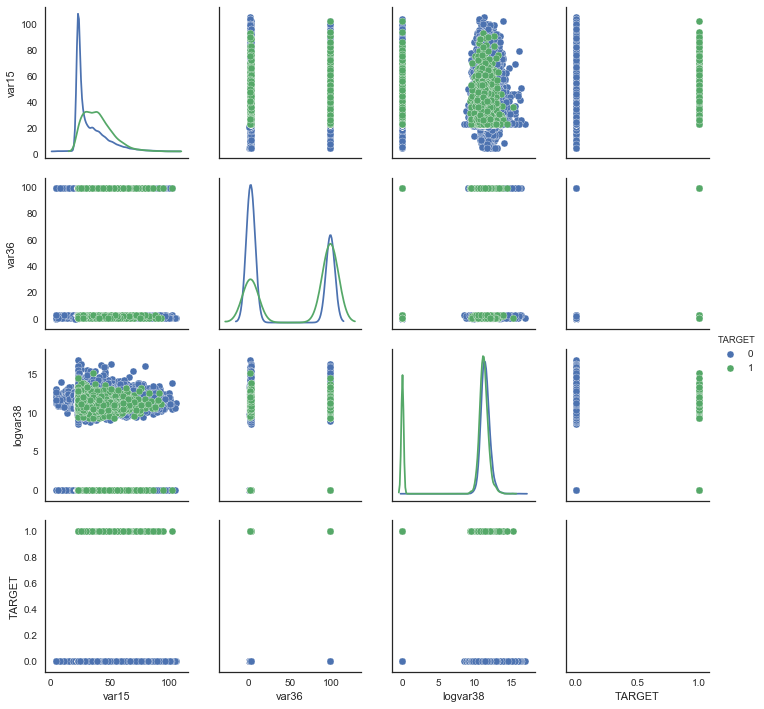

In [37]:
sns.pairplot(train[['var15', 'var36', 'logvar38', 'TARGET']], hue="TARGET", diag_kind="kde")

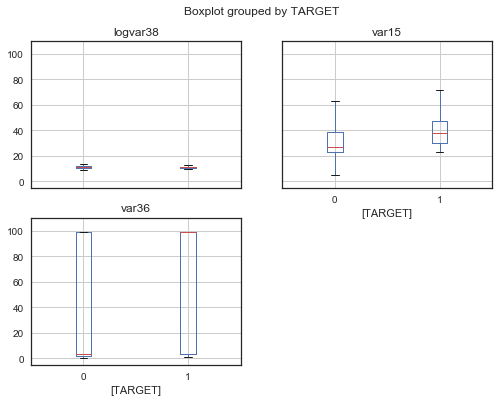

In [48]:
train[['var15','var36','logvar38','TARGET']].boxplot(by="TARGET", figsize=(8, 6));

### correlation matrix of ALL the features ###

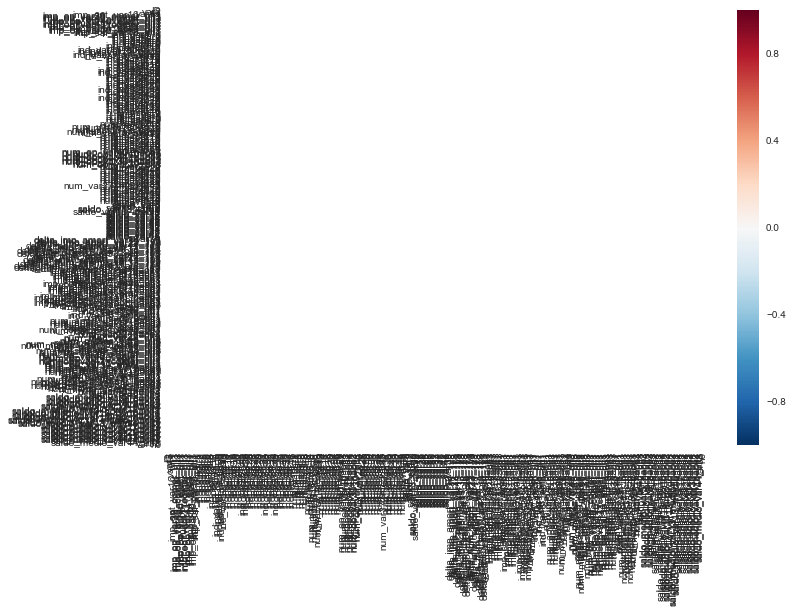

In [49]:
corr_mat = X.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_mat, linewidths=0.5, ax=ax)

### correlation matrix of SELECTED features ###

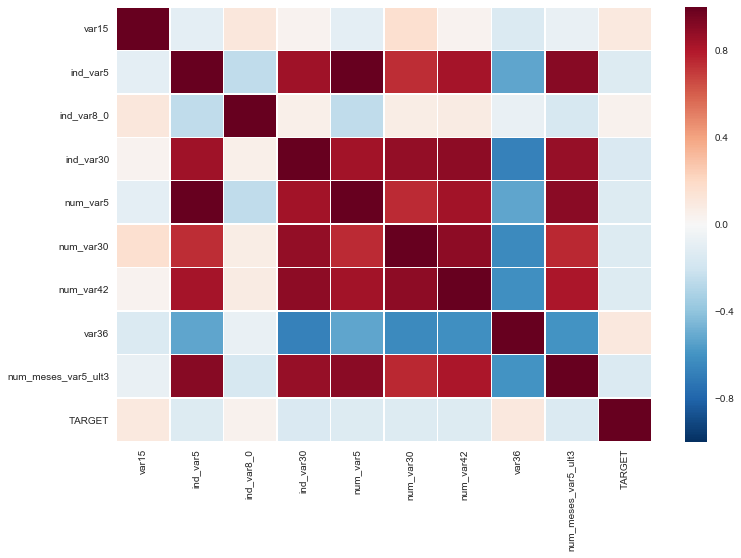

In [50]:
corr_mat = X_sel.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_mat, linewidths=0.5, ax=ax)

In [62]:
## create some criteria for the selection
threshold = 0.7
important_corrs = (corr_mat[abs(corr_mat) > threshold][corr_mat != 1.0]) \
                    .unstack() \
                    .dropna().to_dict()

In [64]:
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

In [67]:
## sorting
unique_important_corrs = unique_important_corrs.ix[abs(unique_important_corrs['correlation']) \
                                                  .argsort()[::-1]]

display(unique_important_corrs)


,attribute pair,correlation
14,"(ind_var5, num_var5)",0.993709
6,"(ind_var5, num_meses_var5_ult3)",0.908842
10,"(num_meses_var5_ult3, num_var5)",0.903272
9,"(num_var30, num_var42)",0.898119
2,"(ind_var30, num_var42)",0.894182
3,"(ind_var30, num_var30)",0.875812
13,"(ind_var30, num_meses_var5_ult3)",0.869045
12,"(ind_var30, ind_var5)",0.848338
1,"(ind_var30, num_var5)",0.843001
11,"(num_var42, num_var5)",0.839574


## Clusters ##

In [68]:
## Resource 
## https://github.com/mgalardini/python_plotting_snippets/blob/master/notebooks/clusters.ipynb
import matplotlib.patches as patches
from scipy.cluster import hierarchy
from scipy.stats.mstats import mquantiles
from scipy.cluster.hierarchy import dendrogram, linkage

In [73]:
## Correlate the data
## also precompute the linkage
## so we can pick up the 
## hierarchical thresholds beforehand
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

## scale to mean 0, variance 1
train_std = pd.DataFrame(scale(X_sel))
train_std.columns = X_sel.columns
m = train_std.corr()
l = linkage(m, 'ward')


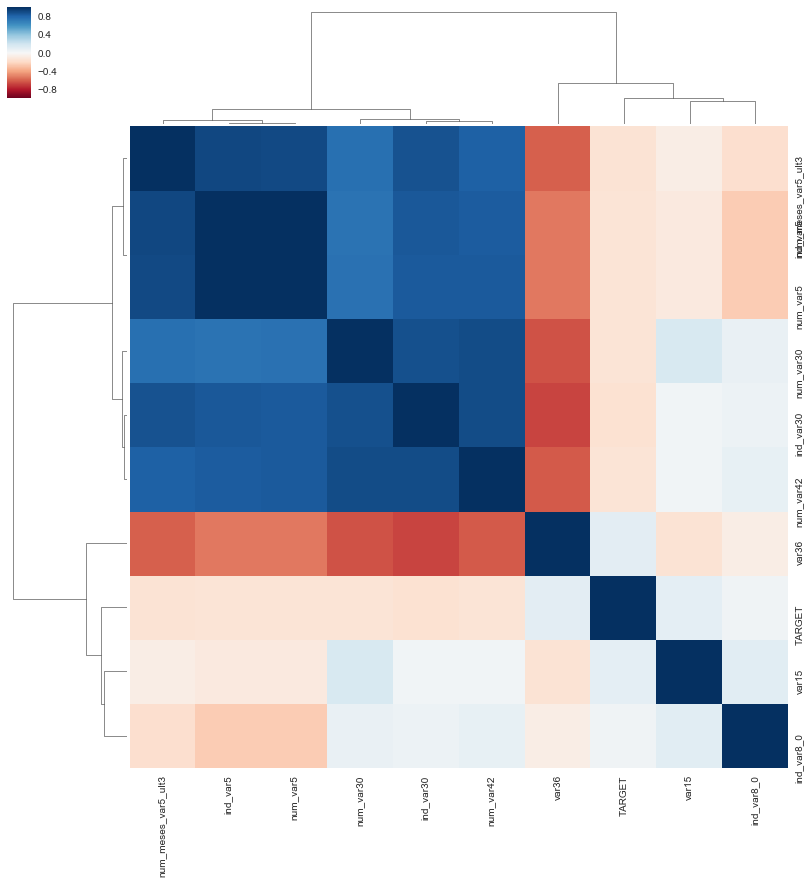

In [76]:
## Please review this for more details
## https://www.kaggle.com/cast42/correlation-pairs

## plot the clustermap
## save the returning object for further plotting

mclust = sns.clustermap(m, linewidths=0, cmap=plt.get_cmap('RdBu'), vmax=1, vmin=-1, 
                        figsize=(14,14), row_linkage=l, col_linkage=l)